In [2]:
import pandas as pd
 
df = pd.read_excel('SuddecCardiacDeathv3.xlsx')
df = df.drop(df.index[0])
df

,sample interval,ECG 1,ECG 2
1,0,-0.281,0.247
2,1,-0.254098,0.242
3,2,-0.215221,0.231
4,3,-0.184098,0.23
5,4,-0.154894,0.224
...,...,...,...
2496,2495,-0.148,-0.02
2497,2496,-0.125106,0.007
2498,2497,-0.091902,0.02
2499,2498,-0.058779,-0.019


In [3]:
list(df.columns)

['sample interval', '    ECG 1', '    ECG 2']

<function matplotlib.pyplot.show(close=None, block=None)>

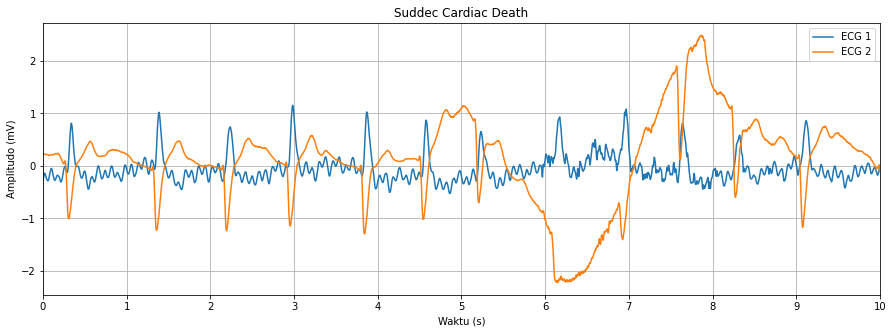

In [17]:
import matplotlib.pyplot as plt
import numpy as np

sample = df['sample interval'].values * 0.004
ecg1 = df['    ECG 1'].values
ecg2 = df['    ECG 2'].values


plt.figure(figsize=(15,5))
plt.plot(sample, ecg1, label='ECG 1')
plt.plot(sample, ecg2, label='ECG 2')
plt.title('Suddec Cardiac Death')
plt.xlabel('Waktu (s)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0,10)
plt.ylabel('Amplitudo (mV)')
plt.grid()
plt.legend()

#mpld3.display()
plt.show

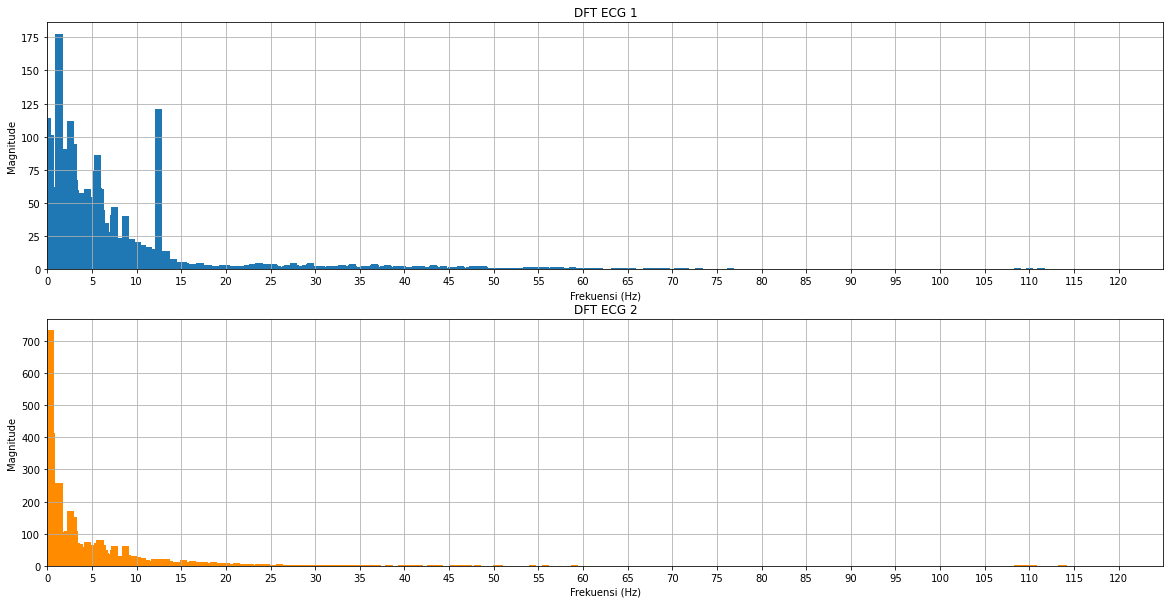

In [19]:
import numpy as np
ec1 = ecg1.reshape(1,-1)
ec2 = ecg2.reshape(1,-1)
N = len(ecg1)
n = np.arange(0,N).reshape(1,-1)
k = np.arange(0,N).reshape(-1,1)
f= np.count_nonzero(n+1)/(0.004*len(sample))

#DFT
scalar = -2j * np.pi / N
matrix =  k * n
mat = scalar * matrix
e = np.exp(mat)

#ECG 1
xk1 = np.sum(ec1 * e, axis=1)
xk_amplitude1 = np.absolute(xk1)

#ECG 2
xk2 = np.sum(ec2 * e, axis=1)
xk_amplitude2 = np.absolute(xk2)

k = k.reshape(-1)

fig, ax = plt.subplots(2, figsize=(20,10))
ax[0].bar(k*f/N, xk_amplitude1)
ax[0].set_title('DFT ECG 1')
ax[0].set_xlim(0,f/2)
ax[0].set_xticks(np.arange(0, f/2, 5))
ax[0].set_xlabel('Frekuensi (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[1].bar(k*f/N, xk_amplitude2, color='#ff8c00')
ax[1].set_title('DFT ECG 2')
ax[1].set_xlim(0,f/2)
ax[1].set_xticks(np.arange(0, f/2, 5))
ax[1].set_xlabel('Frekuensi (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()

#mpld3.display()
plt.show()

Frekuensi Cut-off: 5
Order filter: 15


C:\Users\Nada FH\AppData\Local\Temp\ipykernel_10912\2267051129.py:21: RuntimeWarning: invalid value encountered in true_divide
  hi=np.where(i!=0,np.sin(ohm*i)/(np.pi*i),ohm/np.pi) #lowpass
C:\Users\Nada FH\AppData\Local\Temp\ipykernel_10912\2267051129.py:22: RuntimeWarning: invalid value encountered in true_divide
  hii=np.where(i!=0,-np.sin(ohm*i)/(np.pi*i),(np.pi-ohm)/np.pi) #highpass


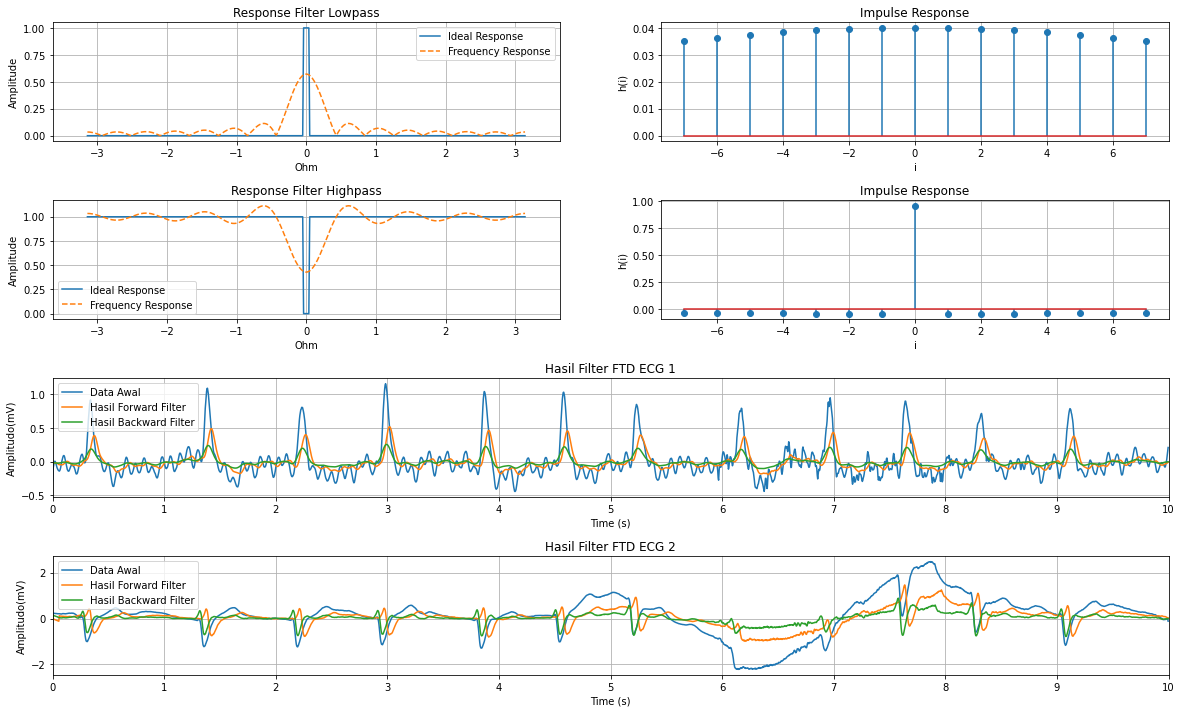

In [24]:
import matplotlib.gridspec as gridspec

# Berdasarkan rumus Ohm=2pif/fs, karena fs=250 dan -pi<Ohm<pi, maka -250<f<251
fArr = np.arange(-f, f+1)
    # X axis (dalam Ohm)
X = fArr*np.pi/f
    # Y axis
temp = np.abs(fArr)
Y = np.where(np.logical_and(temp >= 0, temp <= np.pi), 1, 0)
Y2 = np.where(np.logical_and(temp >= 0, temp <= np.pi), 0, 1)

fc = float(input('Frekuensi Cut-off: '))
orde = int(input('Order filter: '))
f = 1/0.004

ohm = 2*np.pi*fc/f
M = int((orde-1)/2)
i = np.arange(-M, M+1)

#Persamaan Filter
hi=np.where(i!=0,np.sin(ohm*i)/(np.pi*i),ohm/np.pi) #lowpass
hii=np.where(i!=0,-np.sin(ohm*i)/(np.pi*i),(np.pi-ohm)/np.pi) #highpass

z = np.reshape(np.arange(0, (2 * M + 1)), (-1, 1))
i_j_ohm = -1j*z*X

#e^ Matriks i_j_ohm
e_j_i_ohm = np.exp(i_j_ohm, dtype='complex64')
    
# Perkalian matriks persamaan filter dengan e^jiOhm
Response1 = np.matmul(hi, e_j_i_ohm)
Response2 = np.matmul(hii, e_j_i_ohm)
Y2_1 = np.absolute(Response1)
Y2_2 = np.absolute(Response2)

X1 = np.arange(-M, M + 1)

#Filter Forward
x1 = data1-y1
x2 = data2

yi1 = np.zeros(len(df.index))
yi2 = np.zeros(len(df.index))
#persamaan filter(Forward)
for k in range(0, 2*M+1):
    for n in range(len(df.index)):
      try:
        yi1[n] += hi[k-M]*x1[n-k]
        yi2[n] += hii[k-M]*x2[n-k]
      except KeyError:
        continue

#filter backward

yii1 = np.zeros(len(df.index))
yii2 = np.zeros(len(df.index))

#persamaan filter
for k in range(2*M+1): 
    for n in range(len(df.index)):
      try:
        yii1[n] += hi[k-M]*yi1[n+k]
        yii2[n] += hii[k-M]*yi2[n+k]
      except KeyError:
        continue
      except IndexError:
        continue
    
fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(4, 4, wspace=0.5, hspace=0.5)

ax1 = plt.subplot(gs[0, :-2])
plt.plot(X, Y, label='Ideal Response')
plt.plot(X, Y2_1, '--', label='Frequency Response')
plt.xlabel('Ohm')
plt.ylabel('Amplitude')
plt.title('Response Filter Lowpass')
plt.xticks(np.arange(-M, M+1, 1))
plt.xlim(-np.pi-0.5, np.pi+0.5)
plt.legend()
plt.grid()

ax2 = plt.subplot(gs[0, 2:])
plt.stem(X1, hi, use_line_collection=True)
plt.xlabel('i')
plt.ylabel('h(i)')
plt.title('Impulse Response')
plt.grid()

ax3 = plt.subplot(gs[1, :-2])
plt.plot(X, Y2, label='Ideal Response')
plt.plot(X, Y2_2, '--', label='Frequency Response')
plt.xlabel('Ohm')
plt.ylabel('Amplitude')
plt.title('Response Filter Highpass')
plt.xticks(np.arange(-M, M+1, 1))
plt.xlim(-np.pi-0.5, np.pi+0.5)
plt.legend()
plt.grid()

ax4 = plt.subplot(gs[1, 2:])
plt.stem(X1, hii, use_line_collection=True)
plt.xlabel('i')
plt.ylabel('h(i)')
plt.title('Impulse Response')
plt.grid()

ax5 = plt.subplot(gs[2, :])
plt.plot(sample, x1, label = 'Data Awal')
plt.plot(sample, yi1, label = 'Hasil Forward Filter')
plt.plot(sample, yii1, label = 'Hasil Backward Filter')
plt.title('Hasil Filter FTD ECG 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitudo(mV)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0,10)
plt.legend()
plt.grid()

ax6 = plt.subplot(gs[3, :])
plt.plot(sample, x2, label = 'Data Awal')
plt.plot(sample, yi2, label = 'Hasil Forward Filter')
plt.plot(sample, yii2, label = 'Hasil Backward Filter')
plt.title('Hasil Filter FTD ECG 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitudo(mV)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0,10)
plt.legend()
plt.grid()

plt.show()